## Flood Exposure Aggregations, for Classifying Risk
Data: Fathom, Adm2

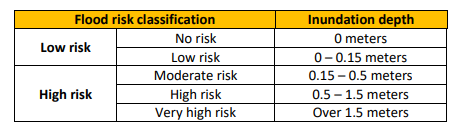

In [1]:
import geopandas as gpd

In [12]:
layer_dir = "D:\\OneDrive\\Work\\WorldBank\\Assignments\\20211104_SSudanWaterSecurity\\Data\\Theme2\\SS_ADM2_wPopFloodExposure.shp"

In [13]:
floodrisk = gpd.read_file(layer_dir)

In [14]:
floodrisk.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM2_EN', 'ADM2_PCODE', 'ADM2_REF',
       'ADM2ALT1EN', 'ADM2ALT2EN', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN',
       'ADM0_PCODE', 'LS18sum', 'Pop_2019', 'under18', 'under5m', 'under5f',
       '5_17m', '5_17f', 'adultsm', 'adultsf', 'over60m', 'over60f',
       'ADM2_EN_1', 'ADM2_PCO_1', 'ADM1_EN_1', 'ADM1_PCO_1', 'Area_km2',
       'Pop_LS18', 'Settlement', 'Healthsite', 'RP5_area_k', 'RP20_area_',
       'RP100_area', 'RP100_ar_1', 'RP250_area', 'rp5_wd80', 'rp20_wd80',
       'rp100_wd80', 'rp250_wd80', 'rp5_haz', 'rp20_haz', 'rp100_haz',
       'rp250_haz', 'RP5_pop', 'RP20_pop', 'RP100_pop', 'RP250_pop',
       'RP5_pop_', 'RP20_pop_', 'RP100_pop_', 'RP250_pop_', 'RP100_sett',
       'RP100_se_1', 'RP100_heal', 'RP100_he_1', 'RP100_buil', 'Area2',
       'pop_no_ris', 'pop_mod_ri', 'pop_high_r', 'pop_vhigh_', 'pop_low_ri',
       'tot_popsum', 'p_no_risk', 'p_low_risk', 'p_mod_risk', 'p_high_ris',
       'p_vhigh_ri', 'geometry'],
      dtype='obj

Calculate Low Flood Risk Aggregate = 'loRA'

In [15]:
floodrisk['pop_loRA'] = floodrisk['pop_no_ris'] + floodrisk['pop_low_ri']
floodrisk['p_loRA'] = (floodrisk['pop_loRA'] / floodrisk['tot_popsum'])*100

Calculate High Flood Risk Aggregate = 'hiRA'

In [16]:
floodrisk['pop_hiRA'] = floodrisk['pop_mod_ri'] + floodrisk['pop_high_r'] + floodrisk['pop_vhigh_']
floodrisk['p_hiRAgg'] = (floodrisk['pop_hiRA'] / floodrisk['tot_popsum'])*100

Calculate Low Flood Risk Plus All Greater Risk = 'loRP'

In [17]:
floodrisk['pop_loRP'] = floodrisk['pop_low_ri'] + floodrisk['pop_mod_ri'] + floodrisk['pop_high_r'] + floodrisk['pop_vhigh_']
floodrisk['p_loRP'] = (floodrisk['pop_loRP'] / floodrisk['tot_popsum'])*100

Calculate Moderate Flood Risk Plus All Greater Risk = 'moRP'

In [18]:
floodrisk['pop_moRP'] = floodrisk['pop_mod_ri'] + floodrisk['pop_high_r'] + floodrisk['pop_vhigh_']
floodrisk['p_moRP'] = (floodrisk['pop_moRP'] / floodrisk['tot_popsum'])*100

Calculate High Flood Risk Plus All Greater Risk = 'hiRP'

In [19]:
floodrisk['pop_hiRP'] = floodrisk['pop_high_r'] + floodrisk['pop_vhigh_']
floodrisk['p_hiRP'] = (floodrisk['pop_hiRP'] / floodrisk['tot_popsum'])*100

Calculate Very High Flood Risk Plus All Greater Risk = 'vhRP'

In [20]:
floodrisk['pop_vhRP'] = floodrisk['pop_vhigh_']
floodrisk['p_vhRP'] = (floodrisk['pop_vhRP'] / floodrisk['tot_popsum'])*100

In [21]:
floodrisk

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,pop_hiRA,p_hiRAgg,pop_loRP,p_loRP,pop_moRP,p_moRP,pop_hiRP,p_hiRP,pop_vhRP,p_vhRP
0,6.425236,18611.507286,Juba,SS0101,None,None,None,Central Equatoria,SS01,South Sudan,...,110631.712970,17.591391,216946.261445,34.496315,110631.712970,17.591391,50750.703705,8.069797,20258.678489,3.221304
1,2.082643,2549.814924,Kajo-keji,SS0102,None,None,None,Central Equatoria,SS01,South Sudan,...,37720.907202,11.451734,66573.886036,20.211242,37720.907202,11.451734,16636.797443,5.050784,5537.052293,1.681000
2,3.402761,3545.715110,Lainya,SS0103,None,None,None,Central Equatoria,SS01,South Sudan,...,20817.695134,13.651483,36424.185123,23.885648,20817.695134,13.651483,9835.290746,6.449624,2820.679851,1.849699
3,2.069064,1326.493498,Morobo,SS0104,None,None,None,Central Equatoria,SS01,South Sudan,...,19692.321312,11.620666,35085.540414,20.704383,19692.321312,11.620666,8975.140318,5.296334,2323.237685,1.370969
4,5.221777,10813.630464,Terekeka,SS0105,None,Terkeka,None,Central Equatoria,SS01,South Sudan,...,78027.677217,31.668373,156486.266672,63.511636,78027.677217,31.668373,42946.596533,17.430338,22169.800917,8.997852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,3.220148,5786.475341,Mvolo,SS1006,None,None,None,Western Equatoria,SS10,South Sudan,...,12439.530521,16.715240,29894.403356,40.169694,12439.530521,16.715240,6947.212268,9.335105,3431.087202,4.610419
74,3.862937,9318.009503,Nagero,SS1007,None,None,None,Western Equatoria,SS10,South Sudan,...,2208.461972,14.174798,4505.007706,28.914954,2208.461972,14.174798,1117.924917,7.175292,404.480408,2.596118
75,5.672132,6529.697021,Nzara,SS1008,None,None,None,Western Equatoria,SS10,South Sudan,...,13605.475483,13.655340,23381.155325,23.466849,13605.475483,13.655340,7778.443513,7.806952,2944.799999,2.955593
76,5.860083,12619.589011,Tambura,SS1009,None,None,None,Western Equatoria,SS10,South Sudan,...,10752.913970,12.725639,20264.141017,23.981791,10752.913970,12.725639,5779.417804,6.839707,1966.509890,2.327285


Export File

In [22]:
floodrisk.to_file("D:\\OneDrive\\Work\\WorldBank\\Assignments\\20211104_SSudanWaterSecurity\\Data\\Theme2\\SS_ADM2_wPopFloodExposureAggregates.shp")